# Support Vector Machines

### Sven Chilton

### Signal Data Science Cohort 3

## The Big Picture

Support Vector Machines originated as classification schemes, though they can be used for regression.  One uses an inner product or an equivalent measure of similarity to draw a boundary between classes such that the margin (the distance between the boundary and the members of either class nearest to it) is maximized.

### Linearly Separable Data, Hyperplanes, and Dot Products

<img src="images/512px-Svm_separating_hyperplanes_(SVG).svg.png">
(Image source: https://commons.wikimedia.org/wiki/File:Svm_separating_hyperplanes_(SVG).svg, used in https://en.wikipedia.org/wiki/Support_vector_machine)

Consider a line in 2D space.  It can be represented as 
\begin{equation}
y = mx+b, 
\end{equation}
or more generally as 
\begin{equation}
w_1 x + w_2 y + b =  \mathbf{w} \cdot \mathbf{x} + b = 0.
\end{equation}
In the equation above, $w_1/w_2 = -m$, $\mathbf{w}$ is a vector normal to the line, and $b$ is an offset.  In particular, $|b|/\| \mathbf{w} \|$ is the minimum distance between the origin and the line.  

The dot product form of the equation above is even more powerful than it might appear.  It can be used to define a hyperplane in an arbitrary number of spatial dimensions.  

For the most part, we will be working in an *input space,* where each $\mathbf{x}$ is an *observation* or row in a data set, each dimension of *x* corresponds to a *feature* or column in that data set, and each $y$ is $\pm 1$, depending on whether the given point is a member of the target class.

We predict the class of a given $\mathbf{x}$ with the decision function will be a member of class 1 if $\mathbf{w} \cdot \mathbf{x} + b \geq 1$, and a member of class -1 if $\mathbf{w} \cdot \mathbf{x} + b \leq -1$. We express $\mathbf{w}$ as a linear combination of each $\mathbf{x}$ in our data set.  The *support vectors* are the data points on the margins, i.e. $\mathbf{w} \cdot \mathbf{x} + b = \pm 1$, which as we'll see later are the ones which affect our scheme's cost function.  The margin between the classes, therefore, has a width of $\frac{2}{\| \mathbf{w} \|}$.  

### Finding the Optimal Hyperplane

Our task is to find $\mathbf{w}$, and thus draw a hyperplane separating our classes, from the support vectors such that the margin width is maximized (up to a cost function, which I will describe later).  To do so, we minimize $\| \mathbf{w} \|$, or equivalently, 
\begin{equation}
\tau (\mathbf{w}) = \frac{1}{2} \| \mathbf{w} \|^2, 
\end{equation}
subject to the constraint 
\begin{equation}
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \ i \in [1,\ell]
\end{equation}

To account for the constraint, we introduce Lagrangian multipliers $\alpha_i \geq 0$ and the Lagrangian 
\begin{equation}
L (\mathbf{w}, b, \mathbf{\alpha}) = 
  \frac{1}{2} \| \mathbf{w} \|^2 - 
  \sum_{i=1}^\ell \alpha_i \left( y_i ( \mathbf{x}_i \cdot \mathbf{w} + b ) - 1 \right).
\end{equation}
From the signs of the terms, we see that we wish to maximize $L$ with respect to $\mathbf{\alpha}$.  By taking the appropriate derivative, we see that the only $i$ values (that is, the only vectors in our data set) with non-zero $\alpha_i$ coefficients are those satisfying $y_i ( \mathbf{x}_i \cdot \mathbf{w} + b ) - 1 = 0$.  In other words, the *support vectors,* those vectors on the margins, are the only ones which contribute to $\mathbf{w}.$

The optimum hyperplane is parametrized by the $\mathbf{w}$ and $b$ which minimize $L$.  Minimizing with respect to $b$ yields 
\begin{equation}
\sum_{i=1}^\ell \alpha_i y_i = 0, 
\end{equation}
while minimizing with respect to $\mathbf{w}$ yields 
\begin{equation}
\mathbf{w} = \sum_{i=1}^\ell \alpha_i y_i \mathbf{x}_i.
\end{equation}
Substituting the previous two equations into the Lagrangian yields the so-called *Wolfe dual* of our optimization problem, 
\begin{equation}
W(\mathbf{\alpha}) = 
  \sum_{i=1}^\ell \alpha_i - 
  \frac{1}{2} \sum_{i=1}^\ell \sum_{j=1}^\ell \alpha_i \alpha_j y_i y_j 
    (\mathbf{x}_i \cdot \mathbf{x}_j), 
\end{equation}
which we maximize, subject to $\alpha_i \geq 0$ and $\sum_{i=1}^\ell \alpha_i y_i = 0.$

Therefore, when the classes are linearly separable, we take the following steps to determine our optimum hyperplane: 

(1) Find the $\alpha_i$ coefficients which maximize $W$ (typically with a coordinate descent method) 

(2) Express $x$ in terms of the support vectors

(3) Determine $b$ from the support vector equation 

(4) Predict the class of each $\mathbf{x}$ with the *decision function* 
\begin{equation}
f(\mathbf{x}) = 
  \textrm{sgn} 
  \left( \sum_{i=1}^\ell \alpha_i y_i (\mathbf{x} \cdot \mathbf{x}_i) + b 
  \right).
\end{equation}

## Kernel Methods, i.e. what happens if the data is not linearly separable

If the data is not linearly separable, we replace the dot product with a kernel $k(\mathbf{w}, \mathbf{x})$.  Many types of kernel exist, though the most common are the following: 

Linear (a.k.a. no kernel):
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = \mathbf{x} \cdot \mathbf{x}^\prime
\end{equation}

Homogeneous polynomial: 
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = ( \mathbf{x} \cdot \mathbf{x}^\prime )^d
\end{equation}

Non-homogeneous polynomial: 
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = ( \mathbf{x} \cdot \mathbf{x}^\prime + c)^d
\end{equation}

Gaussian RBF: 
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = 
  \exp \left( - \frac{\| \mathbf{x} - \mathbf{x}^\prime \|^2}{2 \sigma^2} \right) 
\end{equation}
Note: some implementations instead express this kernel as 
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = 
  \exp \left( - \gamma \| \mathbf{x} - \mathbf{x}^\prime \|^2 \right) 
\end{equation}

### Similarity

A dot product is a measure of the *similarity* of two vectors.  Specifically, it is a measure of how parallel the two vectors are, with the dot product maximized when the vectors are parallel, minimized when the vectors are antiparallel, and equal to 0 when the vectors are orthogonal.  However, kernels represent other measures of similarity.  For example, the Gaussian RBF kernel is a measure of the closeness of the endpoints of two vectors.  It is maximized (at 1) when the vectors' endpoints are identical and minimized (at 0) when the vectors' endpoints are infitely far apart.  We can use this kernel or another similarity measure to draw the optimum nonlinear boundary between our two classes.  

### Input Space vs. Feature Space

<img src="images/Kernel_Machine.png">
(Image source: https://commons.wikimedia.org/wiki/File:Kernel_Machine.png, used in https://en.wikipedia.org/wiki/Support_vector_machine)

From another perspective, each kernel $k$ has an associated *feature map* $\mathbf{\Phi}$ which transforms the *input space* to a higher-dimensional *feature space* where the data is, ideally, linearly separable.  The kernel in the input space is equivalent to a dot product in the feature space, i.e. 
\begin{equation}
k(\mathbf{x}, \mathbf{x}^\prime) = 
  \mathbf{\Phi} (\mathbf{x}) \cdot \mathbf{\Phi} (\mathbf{x}^\prime)
\end{equation}

The feature space can have *infinite dimension!*  Consider, for example, the Gaussian RBF kernel acting on a single-dimensional $x.$  One can show that an associated feature mapping is 
\begin{equation}
\mathbf{\Phi} (x) = 
  \exp \left( - \frac{x^2}{2 \sigma^2} \right)
  \sum_{n=0}^{\infty} \frac{x^n}{(n!)^{1/2} \sigma^n} \mathbf{e}_n, 
\end{equation}
where $\mathbf{e}_n$ is an orthonormal feature space basis vector.  

The feature mappings quickly become more complicated for $x \in \mathbb{R}^m$, with $m > 1$.  For example, if $m = 2$, 
\begin{equation}
\mathbf{\Phi} (\mathbf{x}) = 
  \exp \left( - \frac{\| \mathbf{x} \|^2}{2 \sigma^2} \right)
  \sum_{n=0}^\infty \sum_{i=0}^n \frac{x_1^i x_2^{n-i}}{[i! (n-i)!]^{1/2} \sigma^n} 
  \mathbf{e}_n, 
\end{equation}
while for a general $m$, 
\begin{equation}
\mathbf{\Phi} (\mathbf{x}) = 
  \exp \left( - \frac{\| \mathbf{x} \|^2}{2 \sigma^2} \right)
  \sum_{n=0}^\infty \sum_{k_1 + ... + k_m = n}^\infty 
    \frac{1}{(k_1 ! ... k_m !)^{1/2} \sigma^n}
    \prod_{1 \leq t \leq m} x_t^{k_t} \mathbf{e}_n
\end{equation}

NOTE: The form of the kernel does *not,* in general, correspond to the form of the boundary.  As an example, consider a homogeneous quadratic kernel with $x \in \mathbb{R}^2.$  An associated feature mapping is $\mathbf{\Phi}(\mathbf{x}) = \left(x_1^2, \sqrt{2} x_1 x_2, x_2^2 \right).$  One can show that 4 points on the curve $y = a x^2$ in the input space do not typically map to 4 coplanar points in the feature space.  In other words, a quadratic kernel does not imply a quadratic class boundary in the input space.

### How do we account for the possibly infinite dimensionality of the feature space?

Fortunately, we do not need to know the form of a feature mapping to reap the benefits of a kernel method.  To demonstrate this, let us first assume that $\mathbf{w}$ is normal to the class boundary hyperplane in feature space and expressed as a linear combination of support vectors in feature space, i.e. 
\begin{equation}
\mathbf{w} = \sum_{i=1}^\ell y_i \alpha_i \mathbf{\Phi}(\mathbf{x}_i).
\end{equation}
The *decision function,* which predicts the class of an observation, takes on the following form: 
\begin{equation}
\begin{aligned}
f(\mathbf{x}) &= \textrm{sgn} \left( \mathbf{w} \cdot \mathbf{\Phi}(\mathbf{x}) + b \right)
\\
&= \textrm{sgn} 
  \left( 
    \sum_{i=1}^\ell 
    y_i \alpha_i 
    \mathbf{\Phi}(\mathbf{x}_i) 
    \cdot \mathbf{\Phi}(\mathbf{x}) 
    + b
  \right)
\\
&= \textrm{sgn} \left( \sum_{i=1}^\ell y_i \alpha_i k(\mathbf{x}, \mathbf{x}_i) + b \right).  
\end{aligned}
\end{equation}

The associated *Wolfe dual optimization function,* in turn, becomes 
\begin{equation}
W(\mathbf{\alpha}) = 
  \sum_{i=1}^\ell \alpha_i - 
  \frac{1}{2} 
    \sum_{i=1}^\ell 
    \sum_{j=1}^\ell \alpha_i \alpha_j y_i y_j k(\mathbf{x}, \mathbf{x}_i).  
\end{equation}

In the hard-margin limit, i.e. the assumption that misclassification of the training data is not allowed, we take the same steps to draw the classification boundary as in the linearly separable case, only with each dot product replaced by a kernel.

## Cost Function, Regularization, and the Soft-Margin Case

<img src='images/so-libsvm.png'>
(Image source: http://yaroslavvb.com/upload/save/so-libsvm.png,  
used in http://stackoverflow.com/questions/4629505/svm-hard-or-soft-margins)

Even with kernels, there are some situations where the classes are not linearly separable, or where the margins are so small that the decision functions are prone to overfitting.  To mitigate these situations, we introduce the *hinge loss function* 
\begin{equation}
\max \left( 0, 1 - y_i [ k(\mathbf{w}, \mathbf{x}_i) + b ] \right) 
\end{equation}
(which equals 0 if an $\mathbf{x}_i$ is on the correct side of the boundary and is otherwise proportional to the distance between $\mathbf{x}_i$ and the margin), and an $L^2$ regularization term $\lambda \| \mathbf{w} \|^2$.  We then wish to minimize the cost function 
\begin{equation}
\textrm{cost}(\mathbf{w},b,\lambda) = 
  \left[ 
    \frac{1}{\ell} \sum_{i=1}^\ell 
      \max \left( 0, 1 - y_i [ k(\mathbf{w}, \mathbf{x}_i) + b ] \right) 
  \right] + 
  \lambda \| \mathbf{w} \|^2.
\end{equation}
This can be accomplished either with Wolfe duals or directly with a sub-gradient descent method.

Some implementations vary the influence of the hinge function instead of the regularization term, i.e. they define the cost function as 
\begin{equation}
\textrm{cost}(\mathbf{w},b,C) = 
  \left[ 
    \frac{C}{\ell} \sum_{i=1}^\ell 
      \max \left( 0, 1 - y_i [ k(\mathbf{w}, \mathbf{x}_i) + b ] \right) 
  \right] + 
  \frac{1}{2} \| \mathbf{w} \|^2.
\end{equation}

Note that here, I have expressed $\mathbf{w}$ in the input space basis rather than the feature space basis.  Note also the similarities between the cost function(s) and the Lagrangian described earlier.

## Practical Considerations

### Data Size
SVMs work best in high-dimensional input spaces where the number of observations (the number of data points) is greater than the number of features (the number of dimensions of the input space), but as long as the number of observations isn't too much less than the number of features.  Professor Andrew Ng of Stanford recommends the following guidelines for using SVMs in classification problems: 

Given a number of features $n$ and a number of observations $m$, 

* If $n \gg m$, use logistic regression or SVM without a kernel.

* If $n \in [1,1000]$ and $m \in [10,10000]$, use SVM with a Gaussian kernel. 

* If $n \ll m$, say, $n \in [1,1000]$ and $m < 50000$, use logistic regression or SVM without a kernel.

### Parameters
Moreover, choosing the kernel parameters (say, the width of a Gaussian kernel) and the amount of regularization (or, conversely, the strength of the hinge function) can have significant effects on the performance of an SVM model.  If the regularization term dominates the cost function, the decision boundary will be smooth, but the model is more likely to misclassify data.  If the hinge term dominates, the model will be more likely to classify all data correctly, but the decision boundary will be more complicated and prone to overfitting.  

### Scaling
SVMs are scale-dependent, so in general, one should scale the training data and apply the same scaling to the test data when employing a support vector machine.

## Extensions

Support vector machines can be extended beyond binary classification problems to: 

### Multiclass Classification
Either one-versus-all or one-versus-one.

### Clustering
Similar to multiclass classification, but with unlabeled data.

### Regression
<img src='images/Support_Vector_Regression.jpg'>
(Image source: http://kernelsvm.tripod.com/index_files/image061.jpg, used in http://kernelsvm.tripod.com/)

Rather than finding one optimum boundary, we find many with $k(\mathbf{w},\mathbf{x}) + b = y$, and predict that an observation $\mathbf{x}$ has a target value $y$ if $\mathbf{x}$ is within some small threshold $\varepsilon$ of the boundary.  One can imagine the boundaries as contour lines of a surface, only the surface is terraced rather than continuous.  

### SVEN
In 2014, [Zhou et al.](https://arxiv.org/abs/1409.1976) proved that elastic net regression is a special case of a support vector machine.  They named their implementation SVEN, for Support Vector Elastic Net.


## Applications

Real-world applications include, but are by no means limited to: 

* [Text](https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf) and [hypertext](dl.ifip.org/db/series/lncs/lncs5640/BenbrahimB09.pdf) categorization

* [Image classification](http://www.di.ens.fr/willow/events/cvml2011/materials/practical-classification/), 

* [Hand-written character recognition](https://arxiv.org/pdf/1006.5902)

* [Protein classification](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC169006/)

* [Medical diagnoses from MRI images](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3767485/)

## Implementations

There are many implementations of SVMs.  The most relevant ones to this audience are the [```svm()```](https://cran.r-project.org/web/packages/e1071/vignettes/svmdoc.pdf) function in the R's ```e1071``` package (which we've already seen) and several functions in Python's [```scikit-learn```](http://scikit-learn.org/stable/modules/svm.html) (a.k.a. ```sklearn```) package.



## Toy Problems

### Multiclass classification with the Iris data set
Taken from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [1]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Enable inline plotting with matplotlib
%matplotlib inline

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

In [3]:
# We create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [4]:
# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [5]:
# Plot titles
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

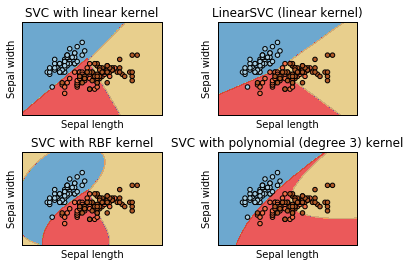

In [6]:
# Generate the plots
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Parameter estimation using grid search with cross-validation
Adapted from [here](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html#example-model-selection-grid-search-digits-py)

In [7]:
# Import modules not already loaded
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [8]:
# Load the Digits dataset
digits = datasets.load_digits()

In [9]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [10]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

In [11]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [12]:
# Find the best parameter tunings according to several different metrics 
scores = ['precision', 'recall', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

Grid scores on development set:

0.987 (+/-0.018) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.959 (+/-0.030) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}
0.988 (+/-0.018) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.982 (+/-0.027) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
0.988 (+/-0.018) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
0.982 (+/-0.026) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.988 (+/-0.018) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}
0.982 (+/-0.026) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 1}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 10}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 100}
0.974 (+/-0.014) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

## Resources

* [Kernel Machines](http://www.kernel-machines.org/), especially their [FAQ page](http://www.kernel-machines.org/frequently-asked-questions)

* [Advances in Kernel Methods: Support Vector Learning](https://www.amazon.com/Advances-Kernel-Methods-Support-Learning/dp/0262194163) (Schölkopf et al., MIT Press, © 1998), especially Chapters 1 and 3

* [The Nature of Statistical Learning Theory](http://www.springer.com/us/book/9780387987804) (Vapnik, Springer Verlag, © 2000, 2nd Edition)

* [Andrew Ng's SVM slides](cs229.stanford.edu/notes/cs229-notes3.pdf), part of [CS 299 at Stanford](http://cs229.stanford.edu/materials.html) and this [Coursera Machine Learning class](https://www.coursera.org/learn/machine-learning).  Note that Ng presents SVMs as a modification of logistic regression, and thus numbers binary classes as 1 and 0.  His formulation is different in appearance from the one presented here, but fundamentally equivalent.

* [Support Vector Machines and Kernel Methods: Status and Challenges](http://www.csie.ntu.edu.tw/~cjlin/talks/kuleuven_svm.pdf) (Lin, 2013, talk at KU Leuven Optimization in Engineering Center)

* [A Tutorial on Support Vector Machines for Pattern Recognition](https://www.microsoft.com/en-us/research/publication/a-tutorial-on-support-vector-machines-for-pattern-recognition/) (Burges, Kluwer Academic Publishers, © 1998) (Mathematically intensive)

* [Kernel Methods in Machine Learning](www.kernel-machines.org/publications/pdfs/0701907.pdf) (Hofmann et al., The Annals of Statistics, © 2008) (Mathematically intensive)